In [ ]:
!pip install yfinance

In [37]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

amazon= yf.download('AMZN', start= "2022-01-01", end= "2023-01-01")
tesla= yf.download("TSLA",start= "2022-01-01", end= "2023-01-01")
google= yf.download('GOOG', start= "2022-01-01", end= "2023-01-01")
microsoft= yf.download('MSFT', start= "2022-01-01", end= "2023-01-01")

amazon.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04 00:00:00-05:00,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05 00:00:00-05:00,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06 00:00:00-05:00,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07 00:00:00-05:00,163.839005,165.243500,162.031006,162.554001,162.554001,46606000


In [39]:
Dataframes= [amazon, tesla, google, microsoft]
Company= ["Amazon", "Tesla", "Google", "Microsoft"]
for df in Dataframes:   
    df.index = df.index.strftime('%Y-%m-%d')

In [40]:
for i in range(4):
    print(Company[i])
    print(Dataframes[i].head())

Amazon
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   

              Volume  
Date                  
2022-01-03  63520000  
2022-01-04  70726000  
2022-01-05  64302000  
2022-01-06  51958000  
2022-01-07  46606000  
Tesla
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05 

In [41]:
for i in range(4):
    print(Company[i])
    print(Dataframes[i].info())

Amazon
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB
None
Tesla
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB
None
Goo

<H3>Analyzing the change in stock price over time</H3>

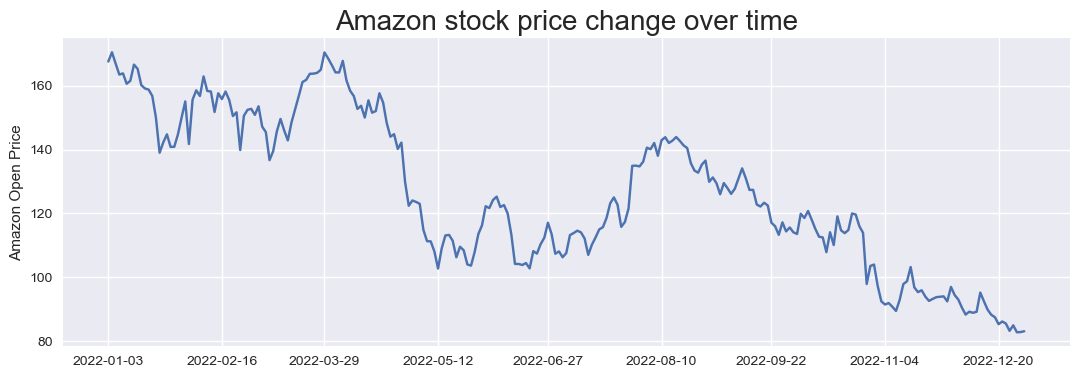

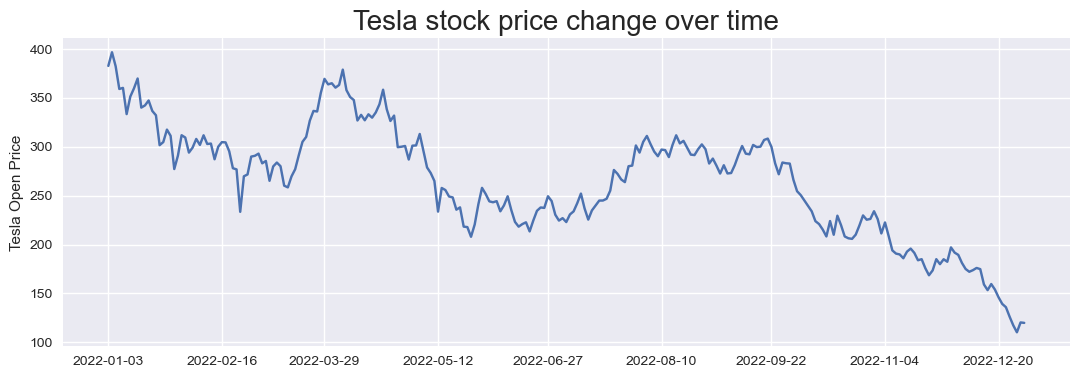

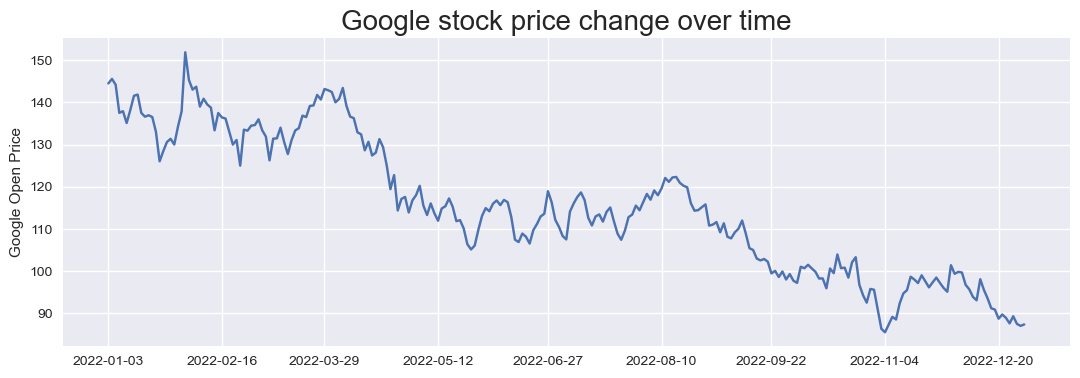

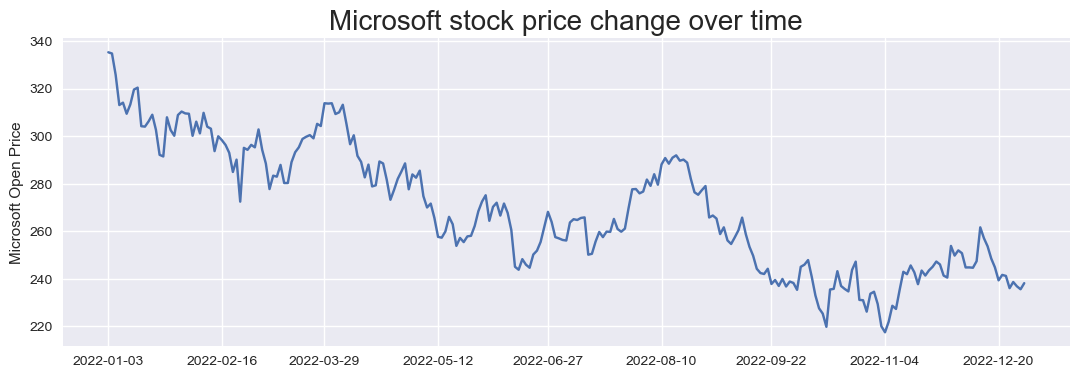

In [53]:
for i in range(4):
    plt.figure(figsize= (13, 4))
    plt.style.use("seaborn")
    
    
    plt.plot(Dataframes[i].index, Dataframes[i]["Open"])
    plt.ylabel(Company[i]+" Open Price")
    plt.title(Company[i]+" stock price change over time", fontdict= {'fontsize': 20})
    ax= plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    
    
 
   
    plt.show()

Amazon stock's vs Tesla stock



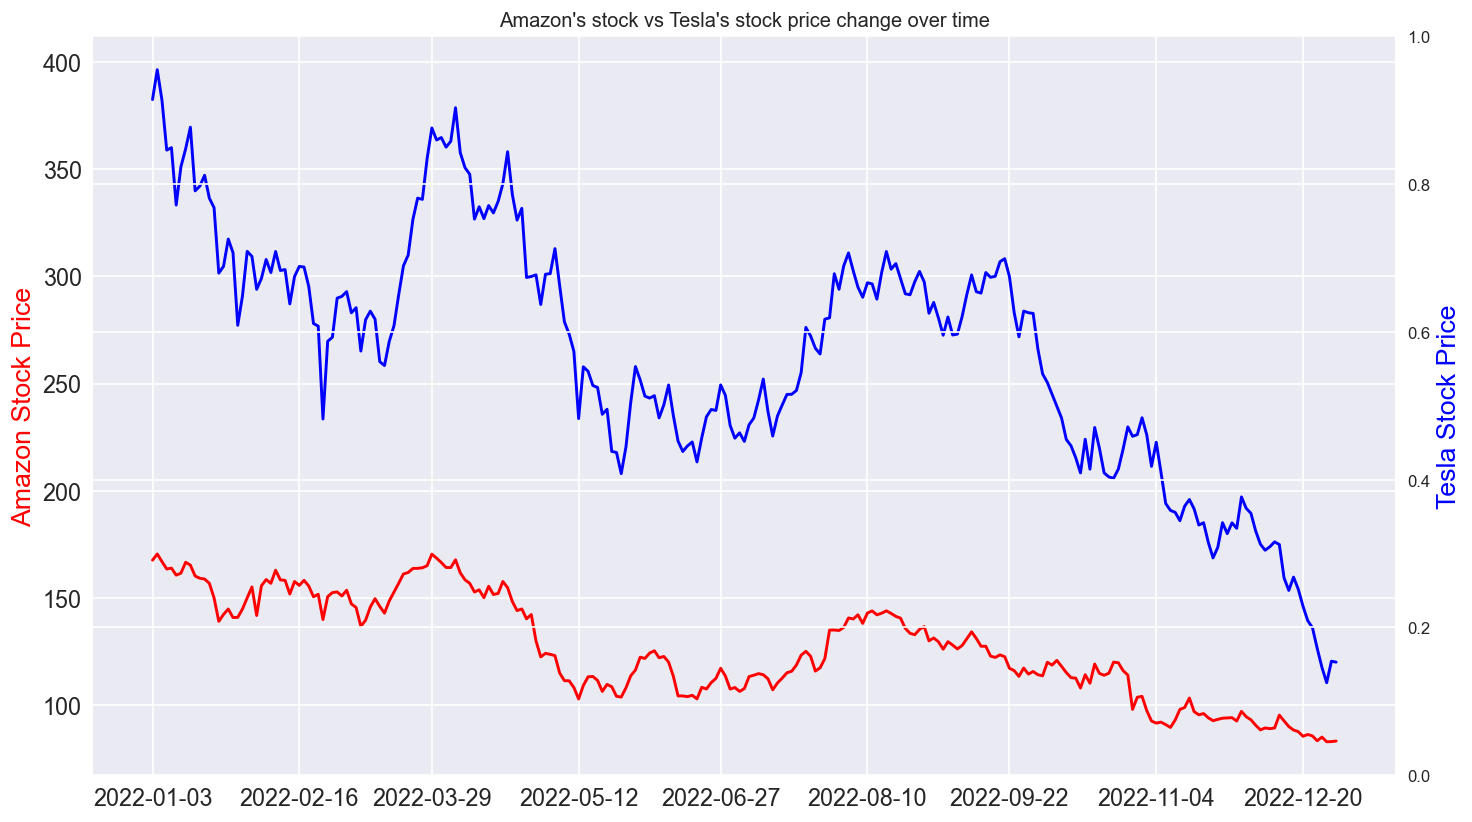

In [55]:
plt.figure(figsize= (14, 8), dpi= 120)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)
plt.title("Amazon's stock vs Tesla's stock price change over time")

ax1= plt.gca()
ax1.xaxis.set_major_locator(MonthLocator(interval= 1))

ax2= ax1.twinx()
ax1.set_ylabel("Amazon Stock Price", color= "red", fontsize= 16)
ax2.set_ylabel("Tesla Stock Price", color= "blue", fontsize= 16)
ax1.plot(tesla["Open"], color= "blue" )
ax1.plot(amazon["Open"], color= "red")

<h3>Moving average of all stocks</h3>

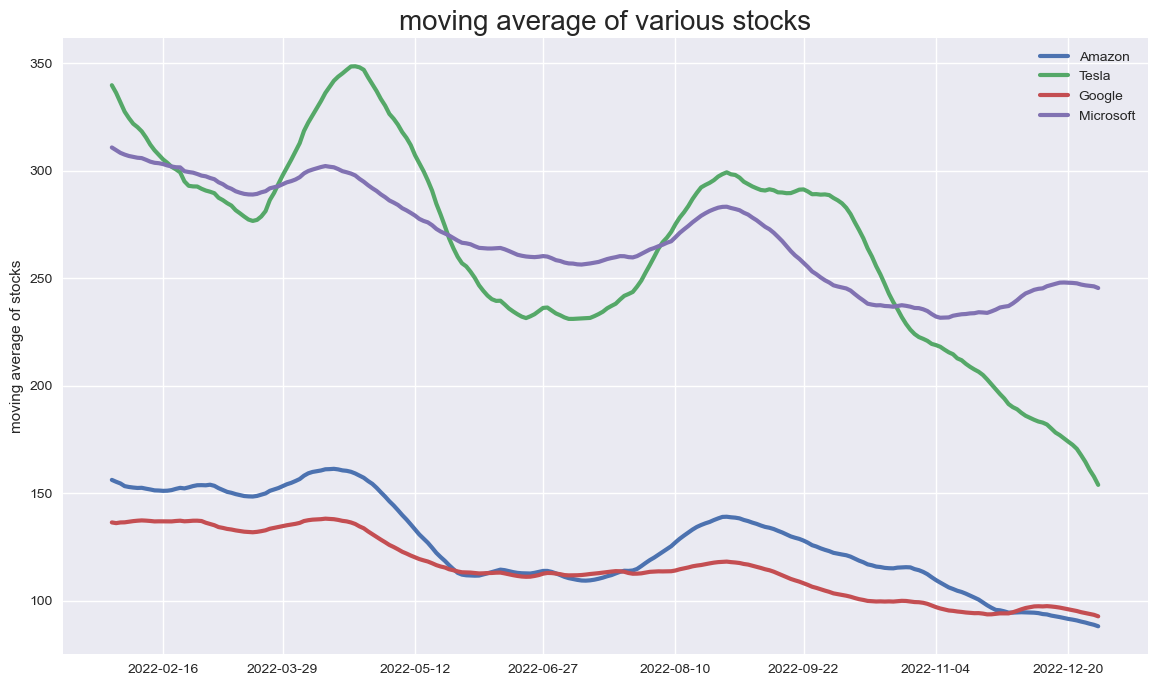

In [58]:
plt.figure(figsize= (14,8))
plt.style.use("seaborn")
for i in range(len(Dataframes)):
    Dataframes[i]['short_rolling']= Dataframes[i]["Open"].rolling(window=20).mean()
    
    
    plt.plot(Dataframes[i]["short_rolling"],
            linewidth= 3,
            label= Company[i])
    plt.ylabel("moving average of stocks")
    plt.title("moving average of various stocks", fontdict={'fontsize': 20})
    
    
    ax= plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
   
    plt.legend()
    
    
    

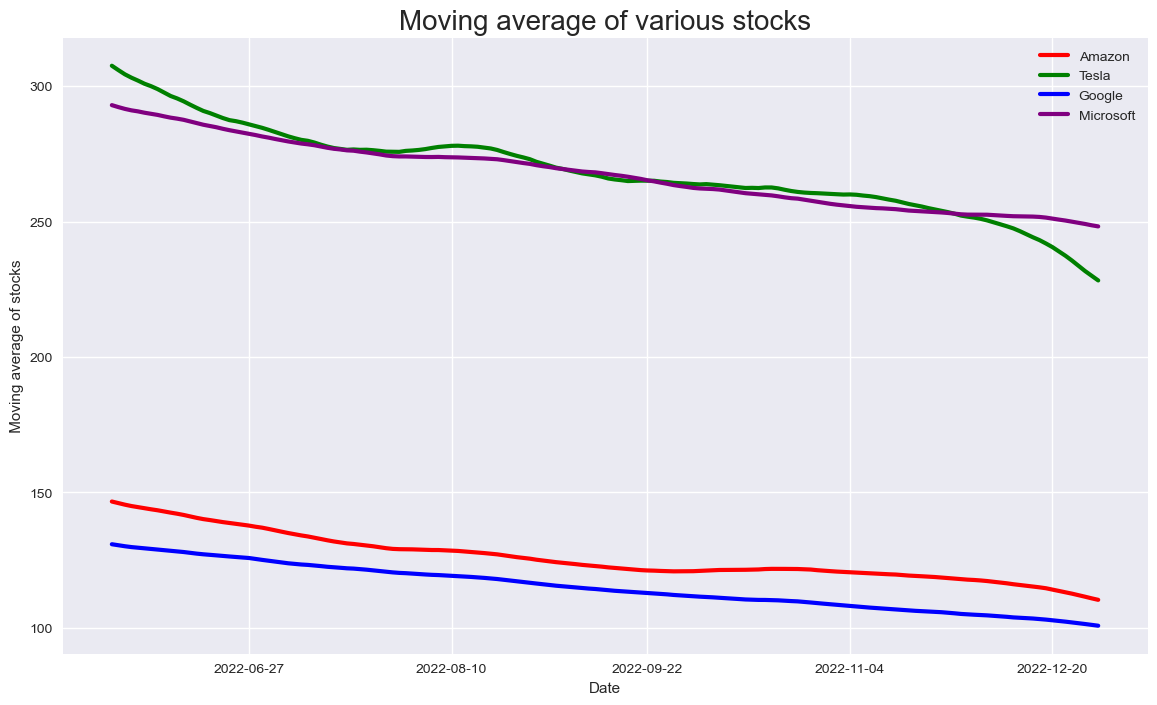

In [60]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")
colors= ['red', 'green', 'blue', 'purple']
for i in range(len(Dataframes)):
    Dataframes[i]['long_rolling']= Dataframes[i]["Open"].rolling(window= 100).mean()
    
    plt.plot(Dataframes[i].index, Dataframes[i]['long_rolling'],
             label= Company[i],
             color=colors[i] ,
            linewidth= 3)
    plt.xlabel('Date')
    plt.ylabel(" Moving average of stocks ")
    plt.title("Moving average of various stocks", fontdict={'fontsize': 20})
    ax= plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    plt.legend()

    

<h3>Daily return average of stock</h3>


In [61]:
daily_return= {}
for i in range(4):
    ret= Dataframes[i]['Adj Close'].pct_change()
    daily_return[Company[i]]= ret
daily_return= pd.DataFrame(daily_return)
daily_return.head()
    

,Amazon,Tesla,Google,Microsoft
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,-0.016916,-0.041833,-0.004536,-0.017147
2022-01-05,-0.018893,-0.053471,-0.046830,-0.038388
2022-01-06,-0.006711,-0.021523,-0.000745,-0.007902
2022-01-07,-0.004288,-0.035447,-0.003973,0.000510


In [62]:
daily_return.describe()

,Amazon,Tesla,Google,Microsoft
count,250.000000,250.000000,250.000000,250.000000
mean,-0.002329,-0.003847,-0.001666,-0.001049
std,0.031571,0.041155,0.024470,0.022289
min,-0.140494,-0.121841,-0.096350,-0.077156
25%,-0.019864,-0.028600,-0.017847,-0.014975
50%,-0.002927,-0.001146,-0.002536,-0.001834
75%,0.016305,0.019595,0.012597,0.012852
max,0.135359,0.106776,0.077460,0.082268


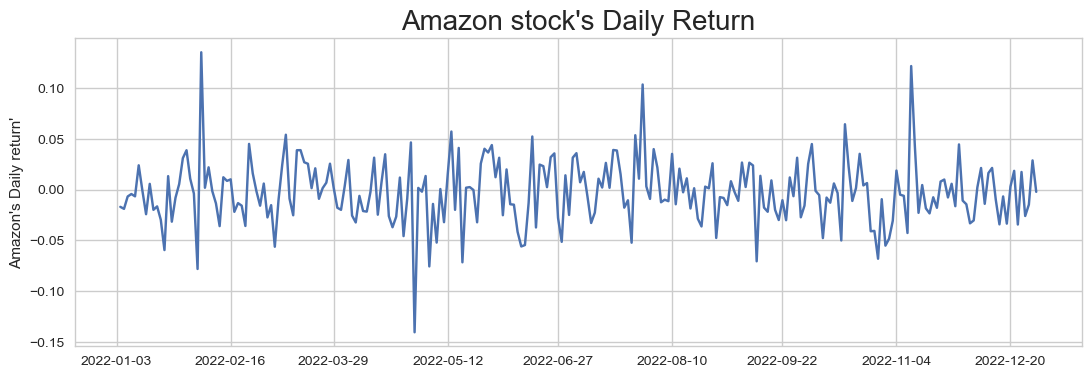

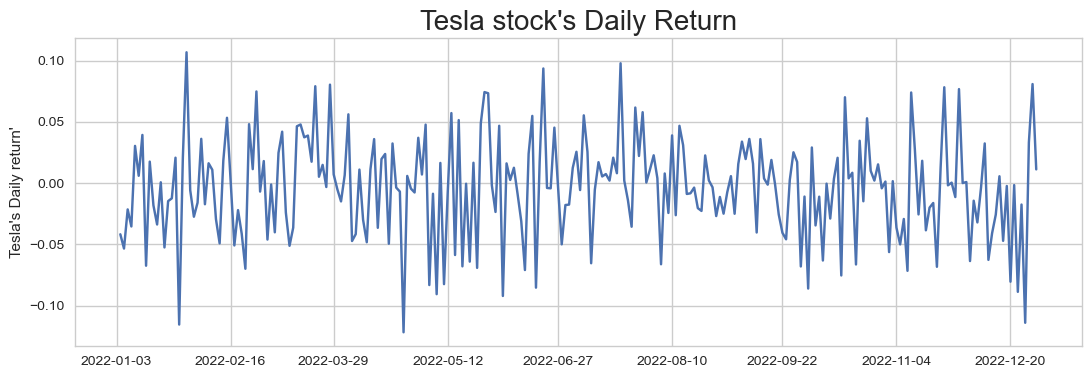

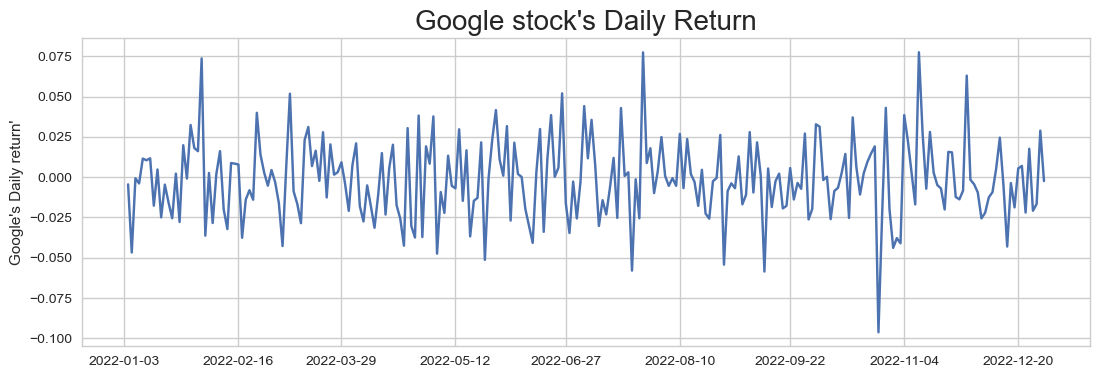

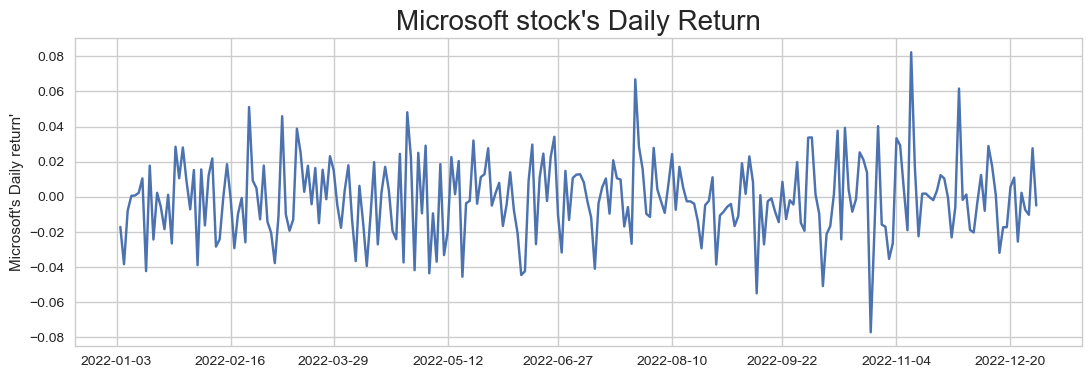

In [65]:
for i in Company:
    plt.figure(figsize= (13,4))
    plt.style.use("seaborn-whitegrid")
    plt.plot(daily_return[i])
    plt.ylabel(i+"'s Daily return'")
    plt.title(i+" stock's Daily Return", fontdict= {'fontsize':20})
    
    ax= plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    
    

<h2>Add a new column "Trend" whose values are based on the "Daily Return"</h2>

In [109]:
def trend(x):
    if x > -0.015 and x <= 0.015:
        return "Slight or No change"
    elif x> 0.015 and x<= 0.04:
        return "Slight positive"
    elif x < -0.015 and x>= -0.4:
        return "Slight Negative"
    elif x> 0.04 and x>= 0.06:
        return "positive"
    elif x< -0.04 and x>= -0.06:
        return "Negative"
    elif x> 0.06 and x<= 0.07:
        return" Among top gainers"
    elif x<-0.06 and x>= -0.07:
        return"Among top losers"
    elif x> 0.07:
        return "Bull run"
    elif x<-0.07:
        return "Bear drop"
for i in range(4):
    Dataframes[i]['Trend']= daily_return[Company[i]].apply(lambda x:trend(x))

   
  

In [110]:

tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,short_rolling,long_rolling,Trend
Date,,,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,167.6515,235.568099,Slight Negative
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,164.5285,233.633099,Slight Negative
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,160.7965,231.709899,Slight positive
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,157.6945,229.963799,positive
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500,153.8380,228.260366,Slight or No change


In [111]:
daily_return.tail()

,Amazon,Tesla,Google,Microsoft
Date,,,,
2022-12-23,0.017425,-0.017551,0.017562,0.002267
2022-12-27,-0.025924,-0.114089,-0.020933,-0.007414
2022-12-28,-0.014692,0.033089,-0.016718,-0.010255
2022-12-29,0.028844,0.080827,0.028799,0.027630
2022-12-30,-0.002138,0.011164,-0.002473,-0.004938


<h3> Visualize trend frequency through a pie chart
</h3>

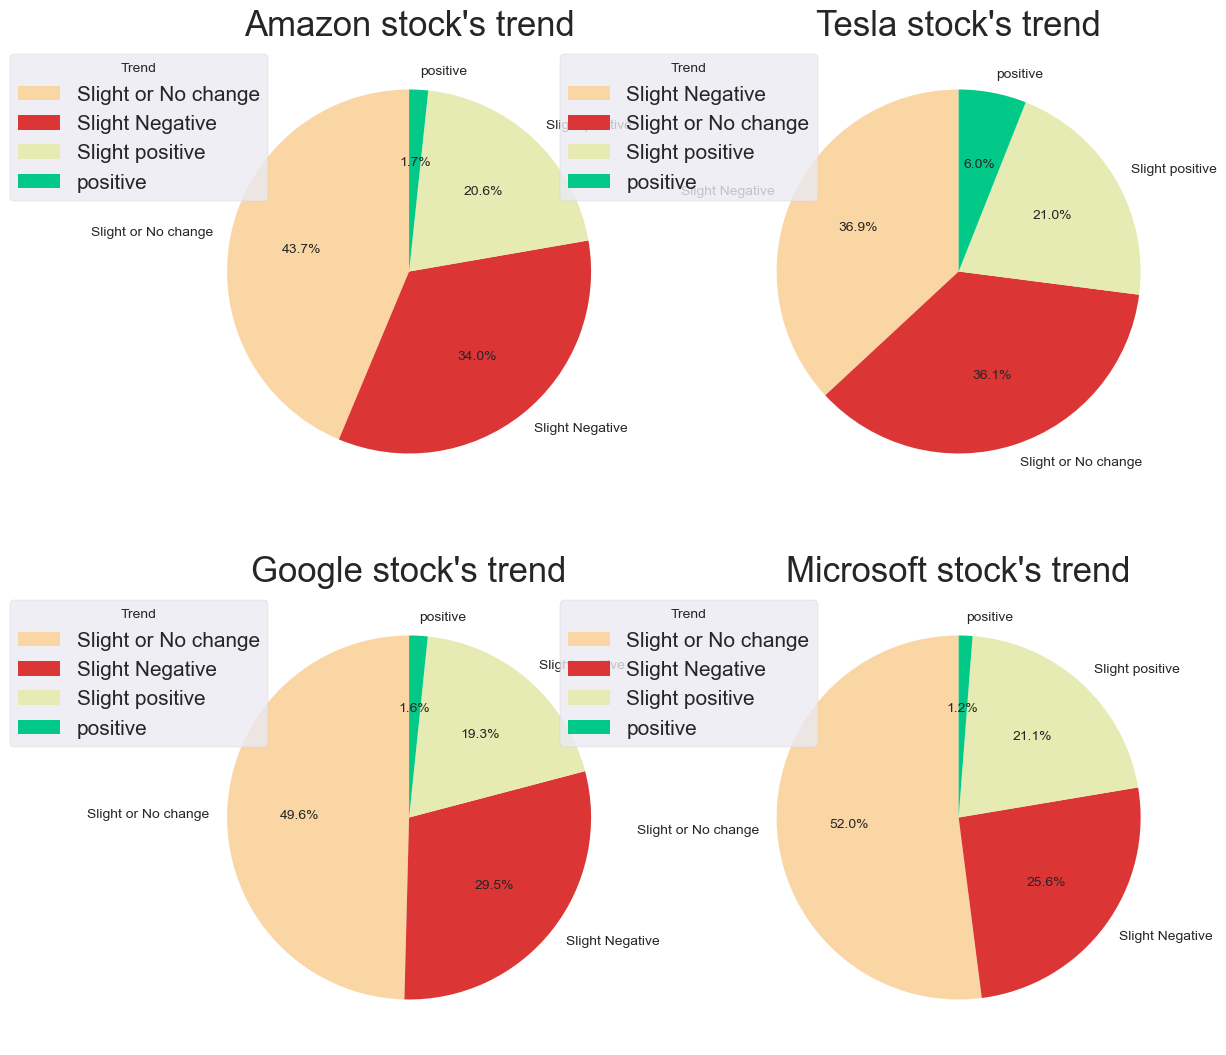

In [156]:
j = 1
plt.figure(figsize= (13, 13))
for i in range(4):
    size= Dataframes[i]["Trend"].value_counts()
    labels= size.index
    explode= (0, 0, 0, 0)
   
    plt.style.use("seaborn")
    colors=  ["#FAD6A5", "#DC3535", "#E5EBB2", "#03C988"]
    plt.subplot(2,2,j)
   
    plt.pie(size,
            explode= explode,
            labels= labels, 
            autopct= "%1.1f%%",
            shadow= False, 
            startangle= 90,
            colors = colors)
    plt.title(Company[i]+" stock's trend", fontdict={'fontsize': 25})
    plt.legend( title= "Trend" ,loc= 'upper left', frameon= True, fontsize= 15, bbox_to_anchor= (-0.4,1))
    j= j+1

Correlation between the daily returns of different stocks


In [157]:
daily_return.corr()

,Amazon,Tesla,Google,Microsoft
Amazon,1.000000,0.591533,0.724022,0.741197
Tesla,0.591533,1.000000,0.556652,0.563946
Google,0.724022,0.556652,1.000000,0.845282
Microsoft,0.741197,0.563946,0.845282,1.000000


<AxesSubplot:>

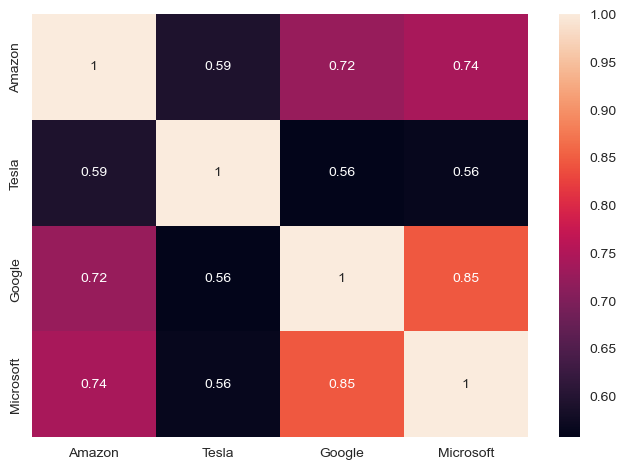

In [160]:
import seaborn as sns
sns.heatmap(daily_return.corr(), annot= True, cbar= True)